<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [ ]:
sac = pd.read_csv('/content/drive/MyDrive/lab-3.01-regression-master/regression_lab_data/sacramento_real_estate_transactions.csv')

In [ ]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [ ]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [ ]:
sac['zip']

0      95838
1      95823
2      95815
3      95815
4      95824
       ...  
980    95829
981    95823
982    95610
983    95758
984    95762
Name: zip, Length: 985, dtype: int64

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

### Query data to see if zero values exist for important features like square ft, number of beds and number of baths. If they exist, they should be dropped. 

In [ ]:

# Get rows with zero values
sac[(sac == 0).any(axis=1)]




,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [ ]:

# Drop rows with zero values in 'beds', 'baths', and 'sq_ft' columns
sac = sac.drop(sac[(sac['beds']==0) | (sac['baths']==0) | (sac['sq__ft']==0)].index)

# Print the resulting dataframe
print(sac)


                  street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   pr

### Query the data to make sure there are no negative home values in the set. Price column needs to be converted to an object to locate any negatives. If any found, remove the negative sign and finally change the column back to an integer. 

In [ ]:
# Get rows with - values
sac[(sac == '-').any(axis=1)]


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [ ]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1588.728501,228930.079853,38.380272,-121.181916
std,85.3440,0.852137,0.669804,669.614454,120814.046487,5.612236,5.610919
min,95603.0000,1.000000,1.000000,-984.000000,-210944.000000,-121.503471,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148562.500000,38.473785,-121.451322
50%,95820.0000,3.000000,2.000000,1418.500000,207858.500000,38.591547,-121.404863
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674704,-121.325720
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,38.668433


In [ ]:



# Convert the 'price' column to string 
sac['price'] = sac['price'].astype(str)

# Find rows with negative price values
negative_price_rows = sac[sac['price'].str.startswith('-')]

# Print the resulting rows
print(negative_price_rows)


               street        city    zip state  beds  baths  sq__ft   type  \
703  1900 DANBROOK DR  SACRAMENTO  95835    AC     1      1    -984  Condo   

                        sale_date    price    latitude  longitude  
703  Fri May 16 00:00:00 EDT 2008  -210944 -121.503471  38.668433  


In [ ]:
import pandas as pd


# Remove the negative sign from the 'price' value -210944
sac['price'] = sac['price'].str.replace('-210944', '210944')

# Print the updated 'price' column to confirm that the negative sign has been removed
print(sac['price'])


0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 814, dtype: object


In [ ]:
# Convert the 'sq__ft' column to string data type
sac['sq__ft'] = sac['sq__ft'].astype(str)

# Find rows with negative square foot values
negative_sq__ft_rows = sac[sac['sq__ft'].str.startswith('-')]

# Print the resulting rows
print(negative_sq__ft_rows)

               street        city    zip state  beds  baths sq__ft   type  \
703  1900 DANBROOK DR  SACRAMENTO  95835    AC     1      1   -984  Condo   

                        sale_date   price    latitude  longitude  
703  Fri May 16 00:00:00 EDT 2008  210944 -121.503471  38.668433  


In [ ]:
# Remove the negative sign from the 'sq__ft' value -984
sac['sq__ft'] = sac['sq__ft'].str.replace('-984', '984')

# Print the updated 'sq__ft' column to confirm that the negative sign has been removed
print(sac['sq__ft'])

0       836
1      1167
2       796
3       852
4       797
       ... 
980    2280
981    1477
982    1216
983    1685
984    1362
Name: sq__ft, Length: 814, dtype: object


In [ ]:


# Convert the 'price' column to integer data type
sac['sq__ft'] = sac['sq__ft'].astype('int64')

# Print the data types of all columns to confirm that 'sq__ft' is now an integer
print(sac.dtypes)


street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price         object
latitude     float64
longitude    float64
dtype: object


In [ ]:


# Convert the 'price' column to integer data type
sac['price'] = sac['price'].astype('int64')

# Print the data types of all columns to confirm that 'price' is now an integer
print(sac.dtypes)


street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object


In [ ]:
sac.head(60)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [ ]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.380272,-121.181916
std,85.3440,0.852137,0.669804,663.841930,119825.576060,5.612236,5.610919
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,-121.503471,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473785,-121.451322
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591547,-121.404863
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674704,-121.325720
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,38.668433


### Minimum home value of $2000 is questionable for a house in California that is 5822 square feet. The mean for square footage is 1591. This value should be dropped. 

In [ ]:

# Find all rows where the 'price' column is equal to 2000
sac[sac['price'] == 2000]
 



,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337


In [ ]:
sac = sac.drop(sac[sac['price'] == 2000].index)


In [ ]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000
mean,95761.587946,3.244772,1.95818,1585.942189,229728.134071,38.380137,-121.181980
std,85.352045,0.852619,0.66638,647.423526,119633.032607,5.615689,5.614373
min,95603.000000,1.000000,1.00000,484.000000,30000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.00000,1144.000000,148750.000000,38.473775,-121.451444
50%,95820.000000,3.000000,2.00000,1418.000000,208000.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.00000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.00000,4400.000000,884790.000000,39.008159,38.668433


In [ ]:

# Count the number of each unique value in the 'type' column
counts = sac['type'].value_counts()

# Create a new dataframe with the counts for each type
type_counts = pd.DataFrame({'type': counts.index, 'count': counts.values})

# Print the resulting dataframe
print(type_counts)


           type  count
0   Residential    758
1         Condo     42
2  Multi-Family     13


### Export Cleaned data to csv

In [ ]:


# Export the 'sac' dataframe to a CSV file
sac.to_csv('sac_export.csv', index=False)

# Print a message confirming export successful
print("Dataframe 'sac' successfully exported to 'sac_export.csv'")


Dataframe 'sac' successfully exported to 'sac_export.csv'


In [ ]:

# Sort the 'price' column of the 'sac' dataframe in ascending order
sorted_prices = sac['price'].sort_values()

# Display only the sorted 'price' column
print(sorted_prices)


603     30000
335     40000
336     48000
605     55422
867     56950
        ...  
552    691659
333    699000
553    760000
334    839000
864    884790
Name: price, Length: 813, dtype: int64


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

Square footage and type would be the main features to predict pricing. 

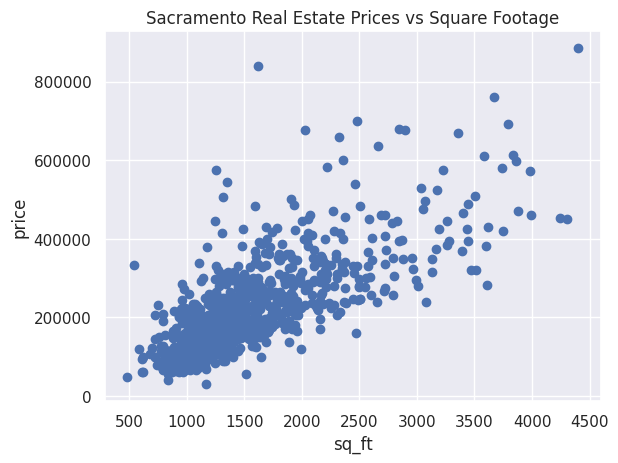

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a scatter plot of 'sq_ft' vs 'price'
plt.scatter(sac['sq__ft'], sac['price'])
plt.xlabel('sq_ft')
plt.ylabel('price')
plt.title('Sacramento Real Estate Prices vs Square Footage')
plt.show()


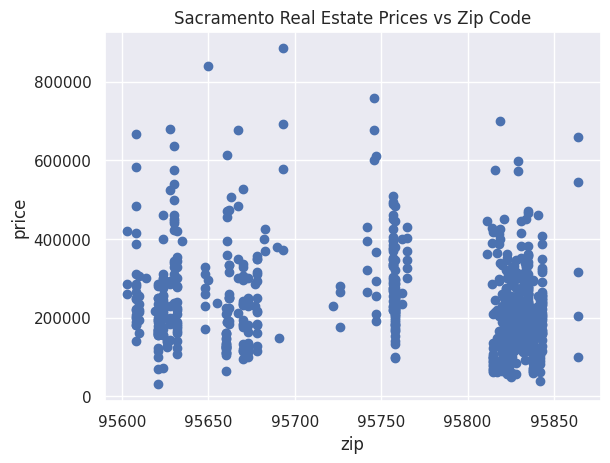

In [ ]:


# Create a scatter plot of 'sq_ft' vs 'price'
plt.scatter(sac['zip'], sac['price'])
plt.xlabel('zip')
plt.ylabel('price')
plt.title('Sacramento Real Estate Prices vs Zip Code')
plt.show()


### 4. Which variable would be the best predictor of Y in an SLR model? Why?

### Square feet would be the best predictor of y in a SLR model because the graph is more linear than a plot of the variable zip code and pricing. 

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [ ]:
import numpy as np
from scipy.optimize import minimize



In [ ]:
def linear_regression(x, y):
   

  # https://docs.scipy.org/doc/scipy/tutorial/optimize.html
  # https://numpy.org/doc/stable/reference/generated/numpy.std.html
  
  
  # SSE function to calculate errors (Target value - Predicted Value)

  def sse(constants):
        b0, b1 = constants
        y_hat = b0 + b1 * x
        return np.sum((y - y_hat) ** 2)

  # Summary statistics to caluclate m(b1) and intercept(B0)

  x_mean = np.mean(x)
  y_mean = np.mean(y)
  sx = np.std(x, axis=0)
  sy = np.std(y, axis=0)
  rxy = np.corrcoef(x,y)[0,1]

  # Calculate slope and intercept

  b1 = rxy * sy / sx
  b0 = y_mean - b1 * x_mean

  # Use Scipy to minimize errors to get best estimations

  res = minimize(sse, (b0, b1))
  b0, b1 = res.x
  return b0, b1




### 6. Interpret the intercept and the slope.

In [ ]:
x = sac['sq__ft']
y = sac['price']
b0, b1 = linear_regression(x, y)
print("Intercept:", b0)
print("Slope:", b1)


Intercept: 16195.545596351789
Slope: 134.64083993681106


In [ ]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000
mean,95761.587946,3.244772,1.95818,1585.942189,229728.134071,38.380137,-121.181980
std,85.352045,0.852619,0.66638,647.423526,119633.032607,5.615689,5.614373
min,95603.000000,1.000000,1.00000,484.000000,30000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.00000,1144.000000,148750.000000,38.473775,-121.451444
50%,95820.000000,3.000000,2.00000,1418.000000,208000.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.00000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.00000,4400.000000,884790.000000,39.008159,38.668433


### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

## For the slope and intercept returned from the function, the slope equation can be used to determine price. Price(y) is a function of sq__ft(x). Using the slope equation, y = mx + b where y = price, m = slope, x = sq_ft and b is the y- intercept. 

The equation of the line would be represented as:

### y = 134.6*x + 16196






In [ ]:
# Predicted price 3920 Shining Star Drive. 
x = 1418
y = 134.6* x + 16196
y

207058.8

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [ ]:

# Define a function that applies the formula y = 134.6*x + 16196 to a given value of x
def predict_price(x):
    return 134.6*x + 16196

# Apply the 'predict_price' function to the 'sq_ft' column 
sac['predicted_price'] = sac['sq__ft'].apply(predict_price)

# Display the resulting 'predicted_price' column 
print(sac['predicted_price'])


0      128721.6
1      173274.2
2      123337.6
3      130875.2
4      123472.2
         ...   
980    323084.0
981    215000.2
982    179869.6
983    242997.0
984    199521.2
Name: predicted_price, Length: 813, dtype: float64


In [ ]:
sac['residuals'] = sac['price'] - sac['predicted_price']
sac['residuals']

0      -69499.6
1     -105062.2
2      -54457.6
3      -61568.2
4      -41572.2
         ...   
980    -90659.0
981     18999.8
982     55130.4
983     -7696.0
984     36216.8
Name: residuals, Length: 813, dtype: float64

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [ ]:
cat_features = ['type']
sac_dummies = pd.get_dummies(sac[cat_features], drop_first=True)

sac =sac.drop(cat_features, axis = 1)
sac = pd.concat([sac, sac_dummies],axis = 1 )

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [ ]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,predicted_price,residuals,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,128721.6,-69499.6,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,173274.2,-105062.2,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,123337.6,-54457.6,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,130875.2,-61568.2,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,123472.2,-41572.2,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#convert dataframes to Np arrays
y = sac['price'].to_numpy()
X = sac[['type_Residential','sq__ft','beds' ]].to_numpy()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

0.5506433592924707

In [ ]:
model.intercept_

27775.294683125918

In [ ]:
model.coef_

array([ 40243.40648367,    156.82738827, -25976.31923065])

In [ ]:
y_pred = model.predict(X)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

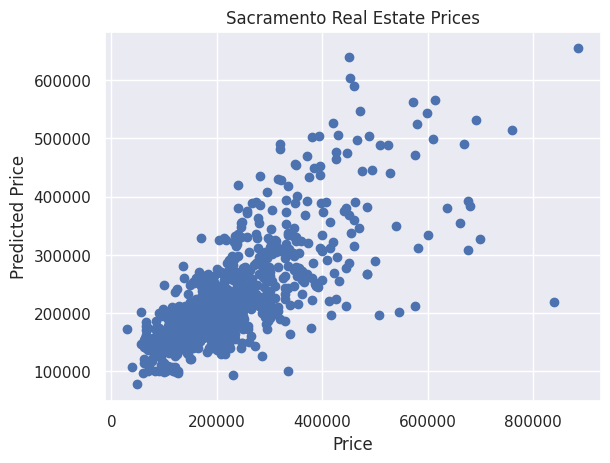

In [ ]:
# Create a scatter plot of 'Predicted Price' vs 'price'
plt.scatter(sac['price'], y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Sacramento Real Estate Prices')
plt.show()

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 



1.   Linearity
2.   No Endogenuity
3.   Normality and Homoscedacity
4.   No autocorrelation
5.   No Multicollinearity

They are all the same assumptions of Simple Linear Regression.








### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

### No endogenuity was not met because a variable that correlates with pricing is also strongly associated with error which indicates a varible was ommitted. (Omitted Variable Bias). No normality and homoscedacity was achieved with the model due to the ommitted variable. 

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
def r2_adj(model, X, y):
    # Sample R^2
    r2 = model.score(X, y)
    # Total Sample Size
    n = X.shape[0]
    # Number of Features used
    p = X.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adjusted_r2 = r2_adj(model, X, y)
print('Adjusted R^2:', adjusted_r2)


Adjusted R^2: 0.5489770182268061


### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [ ]:
mse = np.mean(y -y_pred)**2
mse

3.969579900744091e-23

In [ ]:
mae = np.mean(np.abs(y-y_pred))
mae

57595.14982594887

In [ ]:
#Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

6.300460221875931e-12

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [ ]:
#convert dataframes to Np arrays
y_alt = sac['price'].to_numpy()
X_alt = sac[['type_Residential','sq__ft']].to_numpy()

In [ ]:
reg = LinearRegression()
reg.fit(X_alt, y_alt)

LinearRegression()

In [ ]:
reg.score(X_alt, y_alt)

0.5345083791215983

In [ ]:
reg.coef_

array([28838.43722559,   132.98403888])

In [ ]:
reg.intercept_

-8064.361153623322

In [ ]:
y_alt_predict = reg.predict(X_alt)
y_alt_predict

array([131948.73257964, 175966.4494505 , 126629.37102425, 134076.47720179,
       126762.35506313, 141143.73047509, 167588.45500076, 177296.28983934,
       117073.61943695, 173173.78463392, 141656.56741822, 192190.50219444,
       136603.1739406 , 156417.79573443, 156683.7638122 , 142739.53894171,
       133012.60489071,  97657.94975977,  98968.69093621, 201100.43279972,
       169450.23154514, 197509.86374983, 185674.28428908, 233681.52232649,
       140592.69510715, 165460.7103786 , 148837.705518  , 169583.21558403,
       204292.04973295, 186738.15660016, 130106.05524766, 173971.68886722,
       204292.04973295, 169184.26346737, 130106.05524766, 209345.44321057,
       164662.80614529, 216526.58131035, 173173.78463392,  93003.5083988 ,
       165346.82555212, 181285.81100589, 161205.22113429, 159476.42862878,
       231819.7457821 , 169716.19962291, 230888.85750991, 280757.8720917 ,
       240995.64446515, 217191.50150478, 178759.11426708, 232218.69789876,
       215329.72496039, 2

In [ ]:
mse_2 = np.mean(y_alt -y_alt_predict)**2
mse_2

1.446764244816648e-22

In [ ]:
mae_2 = np.mean(np.abs(y_alt-y_alt_predict))
mae_2

59133.758786187944

In [ ]:
rmse_2 = np.sqrt(mse_2)
rmse_2

1.2028151332672232e-11

In [ ]:


# use the unique() function to get the unique zip codes
unique_zips = sac['zip'].unique()

# sort the unique zip codes in ascending order
sorted_zips = sorted(unique_zips)

# print the sorted unique zip codes
print("Unique zip codes (sorted in ascending order):", sorted_zips)


Unique zip codes (sorted in ascending order): [95603, 95608, 95610, 95614, 95619, 95621, 95623, 95624, 95626, 95628, 95630, 95632, 95635, 95648, 95650, 95655, 95660, 95661, 95662, 95663, 95667, 95670, 95673, 95677, 95678, 95682, 95683, 95690, 95691, 95693, 95722, 95726, 95742, 95746, 95747, 95757, 95758, 95762, 95765, 95811, 95814, 95815, 95816, 95817, 95818, 95819, 95820, 95821, 95822, 95823, 95824, 95825, 95826, 95827, 95828, 95829, 95831, 95832, 95833, 95834, 95835, 95838, 95841, 95842, 95843, 95864]


In [ ]:

# define the zones and their corresponding zip code ranges
zones = {'a': range(95603, 95651),
         'b': range(95655, 95701),
         'c': range(95722, 95751),
         'd': range(95757, 95801),
         'e': range(95811, 95851),
         'f': [95864]}

# create a new column named "zone" 
sac['zone'] = ''

# iterate over the rows to assign the zone
for index, row in sac.iterrows():
    zip_code = row['zip']
    for zone_name, zip_range in zones.items():
        if zip_code in zip_range:
            sac.at[index, 'zone'] = zone_name
            break

# print the updated sac dataframe
print(sac.head())


             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

                      sale_date  price   latitude   longitude  \
0  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879   
1  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028   
2  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839   
3  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146   
4  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768   

   predicted_price  residuals  type_Multi-Family  type_Residential zone  
0         128721.6   -69499.6                  0                 1    e  
1         173274.2  -105062.2                 

In [ ]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 984
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   street             813 non-null    object 
 1   city               813 non-null    object 
 2   zip                813 non-null    int64  
 3   state              813 non-null    object 
 4   beds               813 non-null    int64  
 5   baths              813 non-null    int64  
 6   sq__ft             813 non-null    int64  
 7   sale_date          813 non-null    object 
 8   price              813 non-null    int64  
 9   latitude           813 non-null    float64
 10  longitude          813 non-null    float64
 11  predicted_price    813 non-null    float64
 12  residuals          813 non-null    float64
 13  type_Multi-Family  813 non-null    uint8  
 14  type_Residential   813 non-null    uint8  
 15  zone               813 non-null    object 
dtypes: float64(4), int64(5), o

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

The model has high bias and not enough complexity. The zip code in which the home is located would influence pricing but wasn't included in the model due to time constraints. Based on the R^2 my model can only explain about 53% of variation in home pricing. It's not a very strong model. 